In [1]:
import numpy as np
import pandas as pd

from datetime import date, timedelta
from time import strftime, strptime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

#C/A = booth


In [2]:
# functions to generate filenames to load from MTA

prefix = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
suffix = ".txt"

def year_dows(year, day_of_week):
    """Generator creating strings representing each week in a year, i.e. all Saturdays in 2018
    For all Saturdays in 2018, use year_dows(2018, 6)"""
    d = date(year, 1, 1)                    # January 1st
    mydiff = day_of_week - d.weekday()
    mydiff = mydiff if mydiff > 0 else mydiff + 7
    d += timedelta(days = day_of_week - d.weekday())
    while d.year == year:
        yield d
        d += timedelta(days = 7)    
        
def get_data(week_nums):
    """Get data from MTA website, given an array of date strings"""
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs) 
        
days_of_week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']



In [4]:
def get_data(week_nums, prefix="http://web.mta.info/developers/data/nyct/turnstile/turnstile_"):
    url = "{}{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(prefix, week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [180804,180811,180818,180825,180901,180908,180915,180922]
# or
#week_nums = [170923,170930,171007,171014,171021,171028,171104,171111,171118,\
#             171125,171202,171209,171216,171223,171230,180106,180113,180120,180127,180203,\
#             180210,180217,180224,180303,180310,180317,180324,180331,180407,180414,180421,\
#             180428,180505,180512,180519,180526,180602,180609,180616,180623,180630,180707,180714,\
#             180721,180728,180804,180811,180818,180825,180901,180908,180915,180922]
print(len(week_nums))
%time turnstiles_df = get_data(week_nums, prefix = "data/") # 40 seconds
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
#%time turnstiles_df.to_pickle('turnstiles_df.pickle') # 8 seconds 

8
CPU times: user 4.47 s, sys: 538 ms, total: 5.01 s
Wall time: 5.06 s


In [5]:
# or load from pickle file which we have already downloaded, scrubbed, concatenated
%time turnstiles_df = pd.read_pickle("turnstiles_df.pickle") # 8 seconds
len(turnstiles_df)

CPU times: user 6.46 s, sys: 7.11 s, total: 13.6 s
Wall time: 15.3 s


10304584

In [6]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,STATION_LINE
199101,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,21:00:00,REGULAR,5554,348,2018-09-21 21:00:00,RIT-ROOSEVELT - R
199100,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,17:00:00,REGULAR,5554,348,2018-09-21 17:00:00,RIT-ROOSEVELT - R
199099,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,13:00:00,REGULAR,5554,348,2018-09-21 13:00:00,RIT-ROOSEVELT - R
199098,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,09:00:00,REGULAR,5554,348,2018-09-21 09:00:00,RIT-ROOSEVELT - R
199097,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,05:00:00,REGULAR,5554,348,2018-09-21 05:00:00,RIT-ROOSEVELT - R
199096,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,01:00:00,REGULAR,5554,348,2018-09-21 01:00:00,RIT-ROOSEVELT - R
199095,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,21:00:00,REGULAR,5554,348,2018-09-20 21:00:00,RIT-ROOSEVELT - R
199094,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,17:00:00,REGULAR,5554,348,2018-09-20 17:00:00,RIT-ROOSEVELT - R
199093,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,13:00:00,REGULAR,5554,348,2018-09-20 13:00:00,RIT-ROOSEVELT - R
199092,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,09:00:00,REGULAR,5554,348,2018-09-20 09:00:00,RIT-ROOSEVELT - R


In [7]:
# CHALLENGE 1
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,STATION_LINE
199101,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,21:00:00,REGULAR,5554,348,2018-09-21 21:00:00,RIT-ROOSEVELT - R
199100,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,17:00:00,REGULAR,5554,348,2018-09-21 17:00:00,RIT-ROOSEVELT - R
199099,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,13:00:00,REGULAR,5554,348,2018-09-21 13:00:00,RIT-ROOSEVELT - R
199098,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,09:00:00,REGULAR,5554,348,2018-09-21 09:00:00,RIT-ROOSEVELT - R
199097,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,05:00:00,REGULAR,5554,348,2018-09-21 05:00:00,RIT-ROOSEVELT - R


In [ ]:
# Fix datetime (longest part, takes ~ 20 minutes on 1 year of data)
# strptime("08/25/2018 02:03:40", "%m/%d/%Y %H:%M:%S")
%time turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df['DATE'] + " " + turnstiles_df['TIME'])
turnstiles_df.to_pickle('turnstiles_df.pickle')

In [8]:
# CHALLENGE 2
turnstiles_df.head()



,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,STATION_LINE
199101,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,21:00:00,REGULAR,5554,348,2018-09-21 21:00:00,RIT-ROOSEVELT - R
199100,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,17:00:00,REGULAR,5554,348,2018-09-21 17:00:00,RIT-ROOSEVELT - R
199099,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,13:00:00,REGULAR,5554,348,2018-09-21 13:00:00,RIT-ROOSEVELT - R
199098,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,09:00:00,REGULAR,5554,348,2018-09-21 09:00:00,RIT-ROOSEVELT - R
199097,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,05:00:00,REGULAR,5554,348,2018-09-21 05:00:00,RIT-ROOSEVELT - R


In [9]:
# make 365 days (loaded 53 weeks) and sanity-check 
print (max(turnstiles_df['DATE_TIME']))
# could do date math but … nah
turnstiles_df = turnstiles_df[turnstiles_df['DATE_TIME'] > pd.to_datetime('2017-09-22 00:00:00')]

datecount_df = pd.DataFrame(turnstiles_df.DATE.value_counts().sort_index())
print(datecount_df.DATE.min())
print(datecount_df.DATE.max())

datecount_df



2018-09-21 23:59:34
25532
31029


,DATE
01/01/2018,28157
01/02/2018,28103
01/03/2018,28104
01/04/2018,31029
01/05/2018,28986
01/06/2018,28226
01/07/2018,28128
01/08/2018,28132
01/09/2018,29970
01/10/2018,29691


In [10]:
# clean bogus spaces from columns
print(list(turnstiles_df.columns))
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
# or 
# turnstiles_df.columns=["CA","UNIT","SCP","STATION","LINENAME","DIVISION","DATE","TIME","DESC","ENTRIES","EXITS","DATETIME"]

# SCP goes down to individual turnstiles
# no reason to split SCP into 3 columns but here it is
# scptemp = turnstiles_df['SCP'].str.split('-', expand=True)
# turnstiles_df['SUBUNIT'] = scptemp[0]
# turnstiles_df['CONTROL'] = scptemp[1]
# turnstiles_df['POSITION'] = scptemp[2]

# make sure linenames are always in order e.g. ACENQRS1237W v. 1237ACENQRSW
turnstiles_df['LINENAME']=[''.join(sorted(l)) for l in list(turnstiles_df['LINENAME'])]
# clean up unneeded cols
# aggregate station linename
turnstiles_df.to_pickle('turnstiles_df.pickle')
turnstiles_df[["STATION", "LINENAME","C/A","UNIT","SCP","DATE", "TIME", "DATE_TIME", "ENTRIES", "EXITS"]].head(1000)


['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'STATION_LINE']


,STATION,LINENAME,C/A,UNIT,SCP,DATE,TIME,DATE_TIME,ENTRIES,EXITS
199101,RIT-ROOSEVELT,R,TRAM2,R469,00-05-01,09/21/2018,21:00:00,2018-09-21 21:00:00,5554,348
199100,RIT-ROOSEVELT,R,TRAM2,R469,00-05-01,09/21/2018,17:00:00,2018-09-21 17:00:00,5554,348
199099,RIT-ROOSEVELT,R,TRAM2,R469,00-05-01,09/21/2018,13:00:00,2018-09-21 13:00:00,5554,348
199098,RIT-ROOSEVELT,R,TRAM2,R469,00-05-01,09/21/2018,09:00:00,2018-09-21 09:00:00,5554,348
199097,RIT-ROOSEVELT,R,TRAM2,R469,00-05-01,09/21/2018,05:00:00,2018-09-21 05:00:00,5554,348
199096,RIT-ROOSEVELT,R,TRAM2,R469,00-05-01,09/21/2018,01:00:00,2018-09-21 01:00:00,5554,348
199095,RIT-ROOSEVELT,R,TRAM2,R469,00-05-01,09/20/2018,21:00:00,2018-09-20 21:00:00,5554,348
199094,RIT-ROOSEVELT,R,TRAM2,R469,00-05-01,09/20/2018,17:00:00,2018-09-20 17:00:00,5554,348
199093,RIT-ROOSEVELT,R,TRAM2,R469,00-05-01,09/20/2018,13:00:00,2018-09-20 13:00:00,5554,348
199092,RIT-ROOSEVELT,R,TRAM2,R469,00-05-01,09/20/2018,09:00:00,2018-09-20 09:00:00,5554,348


In [12]:
# show some dupes if not already cleaned up
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2017-09-22 04:00:00,1
6869726,R143,R032,02-03-03,TIMES SQ-42 ST,2017-12-09 19:00:00,1
6869719,R143,R032,02-03-03,TIMES SQ-42 ST,2017-12-08 15:00:00,1
6869720,R143,R032,02-03-03,TIMES SQ-42 ST,2017-12-08 19:00:00,1
6869721,R143,R032,02-03-03,TIMES SQ-42 ST,2017-12-08 23:00:00,1
6869722,R143,R032,02-03-03,TIMES SQ-42 ST,2017-12-09 03:00:00,1
6869723,R143,R032,02-03-03,TIMES SQ-42 ST,2017-12-09 07:00:00,1
6869724,R143,R032,02-03-03,TIMES SQ-42 ST,2017-12-09 11:00:00,1
6869725,R143,R032,02-03-03,TIMES SQ-42 ST,2017-12-09 15:00:00,1
6869727,R143,R032,02-03-03,TIMES SQ-42 ST,2017-12-09 23:00:00,1


In [13]:
# clean up duplicate keys by keeping first only
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [14]:
# fix lines with multiple representations of same set of lines
turnstiles_df['LINENAME']=[''.join(sorted(l)) for l in list(turnstiles_df['LINENAME'])]

station_fixes = [('34 ST-PENN STA', 'ACE', '123ACE'),
                 ('34 ST-PENN STA', '123', '123ACE'),
#                 ('TIMES SQ-42 ST', '1237ACENQRSW', '1237ACENQRS'),
#                 ('42 ST-PORT AUTH', '1237ACEGNRSW', '1237ACENQRSW')
                ]

for station, old_line, new_line in station_fixes:
    print("%s %s -> %s" % (station, old_line, new_line))
    turnstiles_df.loc[(turnstiles_df['STATION']==station) & (turnstiles_df['LINENAME']==old_line), 'LINENAME' ] = new_line

# We have some rows that are '34 ST-PENN STA', '123ACE', don't want 3 stations and don't have info where it belongs 
# (might be able to get a clue by drilling into data, graphing all 3)
# so we combine all 3
# (at first glance thought should do same for Times Square-42nd for consistency but don't seem to have a 3-station issue)

34 ST-PENN STA ACE -> 123ACE
34 ST-PENN STA 123 -> 123ACE


In [15]:

testframe = turnstiles_df.groupby(["STATION", "LINENAME"]) \
    .ENTRIES.count() \
    .reset_index()

testframe.loc[testframe.STATION=="42 ST-PORT AUTH"]


,STATION,LINENAME,ENTRIES
96,42 ST-PORT AUTH,1237ACENQRSW,112932


In [16]:
# concat STATION + LINE
turnstiles_df["STATION_LINE"] = turnstiles_df["STATION"] + " - " + turnstiles_df["LINENAME"]

testframe = turnstiles_df.groupby(["STATION_LINE"]) \
    .ENTRIES.count() \
    .reset_index()

testframe2 = testframe.groupby(["STATION_LINE"]).count() \
    .reset_index() \
    .sort_values("ENTRIES", ascending=False)

#testframe2 = testframe2.drop(testframe2[testframe2['STATION_LINE'] <2].index)
testframe2
#testframe2.tail(34)


,STATION_LINE,ENTRIES
0,1 AV - L,1
306,GUN HILL RD - 5,1
318,HUNTS POINT AV - 6,1
317,HUNTERS PT AV - 7,1
316,HOYT-SCHER - ACG,1
315,HOYT ST - 23,1
314,HOWARD BCH JFK - A,1
313,HOUSTON ST - 1,1
312,HIGH ST - AC,1
311,HEWES ST - JM,1


In [17]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,STATION_LINE
199101,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,21:00:00,REGULAR,5554,348,2018-09-21 21:00:00,RIT-ROOSEVELT - R
199100,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,17:00:00,REGULAR,5554,348,2018-09-21 17:00:00,RIT-ROOSEVELT - R
199099,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,13:00:00,REGULAR,5554,348,2018-09-21 13:00:00,RIT-ROOSEVELT - R
199098,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,09:00:00,REGULAR,5554,348,2018-09-21 09:00:00,RIT-ROOSEVELT - R
199097,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,05:00:00,REGULAR,5554,348,2018-09-21 05:00:00,RIT-ROOSEVELT - R
199096,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,01:00:00,REGULAR,5554,348,2018-09-21 01:00:00,RIT-ROOSEVELT - R
199095,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,21:00:00,REGULAR,5554,348,2018-09-20 21:00:00,RIT-ROOSEVELT - R
199094,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,17:00:00,REGULAR,5554,348,2018-09-20 17:00:00,RIT-ROOSEVELT - R
199093,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,13:00:00,REGULAR,5554,348,2018-09-20 13:00:00,RIT-ROOSEVELT - R
199092,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,09:00:00,REGULAR,5554,348,2018-09-20 09:00:00,RIT-ROOSEVELT - R


In [18]:
%time turnstiles_df.to_pickle('turnstiles_df.pickle') # 8 seconds 

CPU times: user 13.7 s, sys: 22.1 s, total: 35.8 s
Wall time: 1min 2s


In [19]:
# some sanity-checking of how station columns work
print(len((turnstiles_df["STATION"]+ turnstiles_df["LINENAME"]).value_counts()))
print(len((turnstiles_df["STATION"]+turnstiles_df["UNIT"]).value_counts()))
print(len((turnstiles_df["STATION"]+turnstiles_df["LINENAME"]+turnstiles_df[ "UNIT"]).value_counts()))
print(len((turnstiles_df["STATION"]+turnstiles_df["C/A"]).value_counts()))
print(len((turnstiles_df["STATION"]+turnstiles_df[ "LINENAME"]+turnstiles_df["C/A"]).value_counts()))
print(len((turnstiles_df["STATION"]+turnstiles_df[ "LINENAME"]+turnstiles_df["C/A"]+turnstiles_df["UNIT"]).value_counts()))
print(len((turnstiles_df["STATION"]+turnstiles_df[ "LINENAME"]+turnstiles_df["C/A"]+turnstiles_df["UNIT"]+turnstiles_df["SCP"]).value_counts()))


465
486
486
749
749
749
4923


In [20]:
# turnstiles_df.groupby(["STATION","LINENAME"]).count().reset_index() # 459 rows (but some bogus LINENAMES)
# turnstiles_df.groupby(["STATION","UNIT"]).count().reset_index() # 475 rows     
# turnstiles_df.groupby(["STATION","LINENAME", "UNIT"]).count().reset_index() # 477 rows - # hypothesis - screws up bad linenames
# turnstiles_df.groupby(["STATION","CA"]).count().reset_index()['STATION']) # 730 rows (CA unique per LINENAME)
# turnstiles_df.groupby(["STATION", "LINENAME","CA"]).count().reset_index() # 730 rows (still - some stations have multiple units but unique to that station)
# turnstiles_df.groupby(["STATION", "LINENAME","CA","UNIT"]).count().reset_index() # 730 rows 
# turnstiles_df.groupby(["STATION", "LINENAME","CA","UNIT","SCP"]).count().reset_index() # 4727 rows - 



In [46]:
# get diffs by turnstiles by date
turnstiles_daily = (turnstiles_df
                    .groupby(["C/A", "UNIT", "SCP", "STATION_LINE", "DATE"],as_index=False)["ENTRIES","EXITS"] \
                    .first())

turnstiles_daily.head()

,C/A,UNIT,SCP,STATION_LINE,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST - 456NQRW,01/01/2018,6464907,2188209
1,A002,R051,02-00-00,59 ST - 456NQRW,01/02/2018,6466375,2188704
2,A002,R051,02-00-00,59 ST - 456NQRW,01/03/2018,6467957,2189246
3,A002,R051,02-00-00,59 ST - 456NQRW,01/04/2018,6468797,2189588
4,A002,R051,02-00-00,59 ST - 456NQRW,01/05/2018,6470180,2190117


In [47]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = \
    (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION_LINE"])["DATE", "ENTRIES", "EXITS"] \
     .transform(lambda grp: grp.shift(1)))

In [48]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION_LINE,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST - 456NQRW,01/01/2018,6464907,2188209,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST - 456NQRW,01/02/2018,6466375,2188704,01/01/2018,6464907.0,2188209.0
2,A002,R051,02-00-00,59 ST - 456NQRW,01/03/2018,6467957,2189246,01/02/2018,6466375.0,2188704.0
3,A002,R051,02-00-00,59 ST - 456NQRW,01/04/2018,6468797,2189588,01/03/2018,6467957.0,2189246.0
4,A002,R051,02-00-00,59 ST - 456NQRW,01/05/2018,6470180,2190117,01/04/2018,6468797.0,2189588.0


In [49]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION_LINE,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1711704,TRAM2,R469,00-05-01,RIT-ROOSEVELT - R,10/22/2017,5554,321,10/21/2017,5554.0,321.0
1711705,TRAM2,R469,00-05-01,RIT-ROOSEVELT - R,10/23/2017,5554,321,10/22/2017,5554.0,321.0
1711706,TRAM2,R469,00-05-01,RIT-ROOSEVELT - R,10/24/2017,5554,321,10/23/2017,5554.0,321.0
1711707,TRAM2,R469,00-05-01,RIT-ROOSEVELT - R,10/25/2017,5554,321,10/24/2017,5554.0,321.0
1711708,TRAM2,R469,00-05-01,RIT-ROOSEVELT - R,10/26/2017,5554,321,10/25/2017,5554.0,321.0


In [50]:
# Drop the rows for the earliest date in the group which has the nans
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [26]:
pd.DataFrame(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]] \
 .groupby(["C/A", "UNIT", "SCP", "STATION_LINE"])\
 .size())

0
C/A   UNIT SCP      STATION_LINE        
A002  R051 02-00-00 59 ST - 456NQRW    1
           02-00-01 59 ST - 456NQRW    1
           02-03-00 59 ST - 456NQRW    1
           02-03-01 59 ST - 456NQRW    1
           02-03-02 59 ST - 456NQRW    1
           02-03-03 59 ST - 456NQRW    1
           02-03-04 59 ST - 456NQRW    1
           02-03-05 59 ST - 456NQRW    1
           02-03-06 59 ST - 456NQRW    1
           02-05-00 59 ST - 456NQRW    1
           02-06-00 59 ST - 456NQRW    1
A006  R079 00-00-00 5 AV/59 ST - NQRW  1
           00-00-01 5 AV/59 ST - NQRW  1
           00-00-02 5 AV/59 ST - NQRW  1
           00-00-03 5 AV/59 ST - NQRW  1
           00-00-04 5 AV/59 ST - NQRW  1
           00-03-00 5 AV/59 ST - NQRW  1
           00-03-01 5 AV/59 ST - NQRW  1
           00-03-02 5 AV/59 ST - NQRW  1
A007  R079 01-05-00 5 AV/59 ST - NQRW  1
           01-06-00 5 AV/59 ST - NQRW  1
           01-06-01 5 AV/59 ST - NQRW  1
           01-06-02 5 AV/59 ST - NQRW  1
           01-06-03 5 AV/59 ST - NQRW  1
A010  R080 00-00-00 57 ST-7 AV - NQRW  1
           00-00-01 57 ST-7 AV - NQRW  1
           00-00-02 57 ST-7 AV - NQRW  1
           00-00-03 57 ST-7 AV - NQRW  1
           00-00-04 57 ST-7 AV - NQRW  1
           00-00-05 57 ST-7 AV - NQRW  1
...                                   ..
S101  R070 00-03-02 ST. GEORGE - 1     1
           00-03-03 ST. GEORGE - 1     1
S101A R070 01-00-00 ST. GEORGE - 1     1
           01-00-01 ST. GEORGE - 1     1
           01-00-02 ST. GEORGE - 1     1
           01-00-03 ST. GEORGE - 1     1
           01-00-04 ST. GEORGE - 1     1
           01-00-05 ST. GEORGE - 1     1
           01-00-06 ST. GEORGE - 1     1
           01-03-00 ST. GEORGE - 1     1
           01-03-01 ST. GEORGE - 1     1
           01-03-02 ST. GEORGE - 1     1
           01-03-03 ST. GEORGE - 1     1
           01-05-00 ST. GEORGE - 1     1
           01-05-01 ST. GEORGE - 1     1
S102  R165 00-00-00 TOMPKINSVILLE - 1  1
           00-00-01 TOMPKINSVILLE - 1  1
           00-03-00 TOMPKINSVILLE - 1  1
           00-03-01 TOMPKINSVILLE - 1  1
           00-03-02 TOMPKINSVILLE - 1  1
           00-05-00 TOMPKINSVILLE - 1  1
           00-05-01 TOMPKINSVILLE - 1  1
TRAM1 R468 00-00-00 RIT-MANHATTAN - R  2
           00-00-01 RIT-MANHATTAN - R  1
           00-00-02 RIT-MANHATTAN - R  1
TRAM2 R469 00-00-00 RIT-ROOSEVELT - R  2
           00-00-01 RIT-ROOSEVELT - R  2
           00-03-00 RIT-ROOSEVELT - R  2
           00-03-01 RIT-ROOSEVELT - R  2
           00-05-00 RIT-ROOSEVELT - R  1

[4551 rows x 1 columns]

In [51]:
DAILYMAX=10000

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        print("oops")
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
# So we reduced DAILYMAX until histogram looked reasonable
# could maybe go lower since this is 1 entry every 8.6 seconds
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=DAILYMAX)

6337214 6767315.0
oops
5714220 6051527.0
oops
975609 1129094.0
oops
437115 834870.0
oops
5519955 5918877.0
oops
5140889 5499505.0
oops
6445532 6851331.0
oops
10389698 11012652.0
oops
8173520 8656009.0
oops
7219401 7634538.0
oops
3027920 3525708.0
oops
4237317 4703490.0
oops
5536784 5896047.0
oops
2454526 2754143.0
oops
7171045 7452471.0
oops
8475396 8852434.0
oops
1011 2997500.0
2551859 65019.0
oops
14506070 15185911.0
oops
458795 3408571.0
oops
3214654 468774.0
oops
118563927 119019295.0
oops
4288264 4643477.0
oops
6483146 7034166.0
oops
2725907 3670740.0
oops
13983764 14658831.0
oops
10169822 10677971.0
oops
2755858 3188201.0
oops
3440657 3978456.0
oops
259546 1043789.0
oops
16927234 18077249.0
oops
2222 29160757.0
28123516 722819.0
oops
886594225 885874854.0
oops
16065818 16723304.0
oops
1561820760 1562470209.0
oops
1662161141 1662867937.0
oops
1860 982973.0
837782 2076965.0
oops
5773941 5939128.0
oops
4128857 4574679.0
oops
5257440 5813074.0
oops
4692328 5438425.0
oops
2061134 2682

101981 150362.0
oops
616638 92833.0
oops
81641 621962.0
oops
14899 25918.0
oops
19568 102001.0
oops
9 529042.0
176 62866.0
502095 2735.0
114705 277652.0
oops
9000813 9190630.0
oops
1481731 1716048.0
oops
9545817 9807542.0
oops
1710459 1970711.0
oops
5931336 6157137.0
oops
3584210 16809286.0
oops
16792781 3587618.0
oops
56641 34575.0
oops
27 68204.0
179614 324478.0
oops
66382 137672.0
oops
710656 908727.0
oops
1325335 1587476.0
oops
842823 985388.0
oops
1692581 1924961.0
oops
1652218 1948425.0
oops
2181520 2497856.0
oops
2616621 2987982.0
oops
33562 124663.0
oops
683798 888761.0
oops
1136642 1341068.0
oops
755036314 2951090.0
oops
2785841 755364090.0
oops
6544721 7080381.0
oops
5342184 5833633.0
oops
15160326 15895278.0
oops
13908931 14606974.0
oops
98240 649725.0
oops
803272 1214362.0
oops
694614 939861.0
oops
1421661 1762175.0
oops
3062062 3459640.0
oops
494236 977021.0
oops
2586252 3219589.0
oops
4498032 5110088.0
oops
6093963 6741207.0
oops
301695 914596.0
oops
9036547 9538064.0
oop

6561871 7030011.0
oops
958 2944193.0
2536806 82009.0
oops
7076773 7900098.0
oops
964228 1164649.0
oops
741399 889588.0
oops
894333 1043849.0
oops
5878024 6667459.0
oops
1950273 2593535.0
oops
136185648 137107348.0
oops
557 15071166.0
14492598 31577.0
oops
1831651 2245540.0
oops
2022447 2364891.0
oops
1121038 1635658.0
oops
854739 1304762.0
oops
502409 803027.0
oops
6234732 6991571.0
oops
1990679 2411485.0
oops
6728987 7303697.0
oops
285377030 193263.0
oops
377 285382236.0
7864593 8565984.0
oops
3666435 4402465.0
oops
5339599 5836454.0
oops
9100 833688.0
1928394177 1927583337.0
oops
656131 1382540.0
oops
680877 1087734.0
oops
2426718 2717936.0
oops
5961385 6629034.0
oops
2560251 3600308.0
oops
2545161 725543.0
oops
1422 2793082.0
7241019 8120228.0
oops
3523141 4035974.0
oops
9775502 10348447.0
oops
6963394 7392643.0
oops
1676619 2335044.0
oops
1662850742 1663663379.0
oops
7060693 7538470.0
oops
4254954 4560022.0
oops
4752454 5230612.0
oops
6428202 6879752.0
oops
7915257 8489692.0
oops
5

937353 1374231.0
oops
307443 361637.0
oops
50874187 51032876.0
oops
1959575 2223882.0
oops
10103860 12186000.0
oops
7774162 7763807.0
oops
6627778 8467618.0
oops
6915872 6905815.0
oops
6926528 6915872.0
oops
6936739 6926528.0
oops
21885662 23467185.0
oops
14668728 15971876.0
oops
1395694419 1396695310.0
oops
4210991 4835016.0
oops
12538329 13356027.0
oops
5733266 6632800.0
oops
167231 1240174.0
oops
3766448 4847535.0
oops
12396585 13071701.0
oops
2347792 2957258.0
oops
10587133 11142164.0
oops
4093830 4738009.0
oops
1593569 2730659.0
oops
8771070 9465781.0
oops
2398354 2804317.0
oops
4584521 4808942.0
oops
4282346 4482936.0
oops
707005 865894.0
oops
4223279 4500787.0
oops
10192343 10780338.0
oops
524879 3346426.0
oops
3082076 527600.0
oops
9976615 10581784.0
oops
13696555 14240207.0
oops
42464 551486.0
oops
2576802 3124235.0
oops
3743625 4428575.0
oops
2758507 3347809.0
oops
14967650 15886655.0
oops
10791825 11412796.0
oops
2032409359 2033055984.0
oops
4376660 4931080.0
oops
10629663 1

11582846 12125338.0
oops
762 11178158.0
10791925 164458.0
oops
124116 585347.0
oops
3210496 3363740.0
oops
2165319 2302102.0
oops
1279250 1397692.0
oops
1968502 2689704.0
oops
8183683 8672437.0
oops
4326543 4810073.0
oops
4865182 5506222.0
oops
4465461 5100866.0
oops
12563623 13487535.0
oops
13015638 14400210.0
oops
2375514 2788823.0
oops
378 2776359.0
2640443 55089.0
oops
3217863 3409396.0
oops
4610479 4907021.0
oops
101109439 101753974.0
oops
4721816 5141040.0
oops
4874256 5281202.0
oops
6135330 6548244.0
oops
8485617 9113121.0
oops
5305479 5706261.0
oops
2684279 3005469.0
oops
3572888 3975836.0
oops
3 262323.0
262319 34.0
2104982 2339728.0
oops
706018481 706464380.0
oops
4513330 4620214.0
oops
8705512 8847560.0
oops
7682365 7863259.0
oops
8973384 9177955.0
oops
6566166 6994271.0
oops
2332652 3071234.0
oops
18596930 19803832.0
oops
1040500 1234365.0
oops
5039619 5244292.0
oops
6041013 6500704.0
oops
5779139 6219562.0
oops
41914 264209.0
oops
6016861 6347271.0
oops
7181794 7576367.0
o

3946414 4280507.0
oops
12406812 12983189.0
oops
2492833 2714993.0
oops
92 2172980.0
2114918 118748.0
oops
757316 832083.0
oops
2858672 3109248.0
oops
2067405 2201067.0
oops
4726640 4898723.0
oops
5661871 5859466.0
oops
2637065 2800970.0
oops
1413627 1495253.0
oops
558604 592775.0
oops
306446 338220.0
oops
5492179 5850474.0
oops
6634989 7062840.0
oops
2571510 3311359.0
oops
2085230 2352096.0
oops
1821903 1991515.0
oops
747959 827564.0
oops
458843 4640734.0
oops
4598805 488181.0
oops
458791 21056.0
oops
9209 467360.0
21146 248525.0
oops
246985 22104.0
oops
7172140 7571893.0
oops
5709620 6003202.0
oops
2507581 2942562.0
oops
1254658 2177782.0
oops
4564553 5446545.0
oops
1597391 2327879.0
oops
5424272 6179514.0
oops
889224 1080613.0
oops
4159502 4416958.0
oops
4183601 4503943.0
oops
6012994 6536138.0
oops
8093891 8806030.0
oops
5347791 775322.0
oops
1431 5527282.0
1434701 2716952.0
oops
10605113 11538946.0
oops
861039 1979598.0
oops
4275241 5468704.0
oops
4510167 5548719.0
oops
386503 1155

5025807 5247664.0
oops
5425083 5789625.0
oops
1013261 1304175.0
oops
8359213 8981370.0
oops
6312606 6927256.0
oops
8251957 8774200.0
oops
1121814 1493751.0
oops
763 778475.0
725602 125741.0
oops
3595698 3786278.0
oops
57272155 57681647.0
oops
10997353 11612409.0
oops
2162672 2874333.0
oops
1041635952 1042476969.0
oops
120345521 1347536.0
oops
3170 120409011.0
5625248 6288326.0
oops
14074026 14734892.0
oops
3035166 3630498.0
oops
784608 860092.0
oops
692473 1095701.0
oops
824 252674.0
80632 118558.0
oops
964037 1291620.0
oops
494 2911426.0
2801300 162161.0
oops
5405558 5992446.0
oops
3377289 4295703.0
oops
298639 1511198.0
oops
25470458 27016442.0
oops
1257855663 1256124463.0
oops
3946 9652856.0
1472 112648.0
7871978 9326.0
447779 465839.0
oops
2248017 2283436.0
oops
1795177 1872705.0
oops
3495224 3646139.0
oops
460885 486981.0
oops
2402746 2733412.0
oops
3420263 3901102.0
oops
512830 1305023.0
oops
705743 1821975.0
oops
22872786 24245328.0
oops
2068146 3563149.0
oops
237327983 23790305

77769 180673.0
oops
117474 273548.0
oops
206037 471386.0
oops
323649 788841.0
oops
9 17582.0
50 122720.0
24612 3941.0
164 48732.0
480 13387.0
22524 194430.0
oops
109 81846.0
23 12470.0
93 41955.0
29911 553.0
250 127317.0
75905 34406.0
oops
274750 337173.0
oops
10479 57558.0
oops
61 10847.0
153 87911.0
19923 79643.0
oops
156 159437.0
24843 35765.0
oops
171 146616.0
35047 89021.0
oops
840750 1082733.0
oops
154241 335966.0
oops
698 185211.0
238 918298.0
517383 29983.0
oops
106171 384544.0
oops
465 245859.0
150 304786.0
340 260645.0
55333 81843.0
oops
910 136841.0
42713 225839.0
oops
471 107206.0
81664 301960.0
oops
28497 39581.0
oops
89678 105289.0
oops
124 15685.0
125380 1077.0
26 132015.0
26 244437.0
225365 27951.0
oops
32780 19083.0
oops
12 45358.0
20802 81583.0
oops
168 23443.0
103 17542.0
368 324009.0
0 21149.0
136733 25353.0
oops
6276 157394.0
11542 185627.0
oops
2491 230159.0
169087 128702.0
oops
7 181457.0
64378 541199.0
oops
190949 766625.0
oops
880880 1510716.0
oops
3816934 4579

1717 256929.0
0 79717.0
71161 6509.0
1041 209759.0
2047 73451.0
2213 86119.0
2108 27434.0
130146 389825.0
oops
481 247018.0
2008 300386.0
45755 294620.0
oops
1264 134637.0
2093 1042359.0
408997 69850.0
oops
699 27529.0
708 423537.0
124163 29018.0
oops
413 196698.0
216 29426.0
355 132601.0
2503 44351.0
78172 443057.0
oops
1403 91681.0
255 196547.0
0 30747.0
36657 431427.0
oops
390 676286.0
352835 277123.0
oops
230945 814179.0
oops
1240 341353.0
2177 301028.0
142793 120876.0
oops
758 203091.0
7542 68432.0
702 31870.0
594 17713.0
266930 534876.0
oops
178026 240233.0
oops
416 187254.0
64 99846.0
159750 91250.0
oops
821 208448.0
1639 240919.0
669 339453.0
102295 43387.0
oops
235 128546.0
6 33002.0
31535 113944.0
oops
193 232854.0
133686 11695.0
oops
270 21232.0
21637 49348.0
oops
1 33754.0
6734 63872.0
31759 60041.0
oops
33618 59509.0
oops
4372 35800.0
4954 41281.0
49260 29436.0
oops
129 49386.0
35383 76591.0
oops
71341 116961.0
oops
1531 397006.0
284177 301277.0
oops
460204 1022075.0
oops


292487 1039120.0
oops
1881530 2579656.0
oops
15351189 15930828.0
oops
6645453 7016847.0
oops
1699312 1990815.0
oops
1917337 2748316.0
oops
192341 636867.0
oops
678307 1141947.0
oops
54149 625812.0
oops
283334 569604.0
oops
6580254 6942808.0
oops
2065197 2384759.0
oops
9541249 9899176.0
oops
3599915 4100630.0
oops
19287812 20194126.0
oops
65803 353728.0
oops
87745 423822.0
oops
357 127011.0
904 85701.0
380 39602.0
75616 42586.0
oops
729 111220.0
6763456 7161625.0
oops
163897 707326.0
oops
7470536 8213856.0
oops
5876565 6364402.0
oops
2443437 2630366.0
oops
518194 1047097.0
oops
4175756 5103184.0
oops
5293475 6074355.0
oops
5857945 6182185.0
oops
3685927 4084338.0
oops
2651404 3266163.0
oops
10225833 10976019.0
oops
1317100 1517864.0
oops
832587 1170146.0
oops
493 311026.0
125430 140433.0
oops
2537209 2836501.0
oops
67926 373106.0
oops
191071 546548.0
oops
3164421 3536009.0
oops
191496 763670.0
oops
7277021 8153706.0
oops
8033586 9141035.0
oops
2452 4417046.0
3395555 345413.0
oops
197193

34946745 34935950.0
oops
34982402 34971514.0
oops
34993624 34982402.0
oops
35004845 34993624.0
oops
35015765 35004845.0
oops
35067064 35056770.0
oops
35106769 35095672.0
oops
35116913 35106769.0
oops
35154150 35143334.0
oops
35165247 35154150.0
oops
35176276 35165247.0
oops
35186871 35176276.0
oops
35339616 35328781.0
oops
35433583 35423396.0
oops
35444178 35433583.0
oops
35454935 35444178.0
oops
35465499 35454935.0
oops
35501353 35490538.0
oops
35512130 35501353.0
oops
35522737 35512130.0
oops
35533168 35522737.0
oops
35569740 35558780.0
oops
35580755 35569740.0
oops
35591397 35580755.0
oops
35602094 35591397.0
oops
35628682 35618583.0
oops
35638973 35628682.0
oops
35649591 35638973.0
oops
35660898 35649591.0
oops
35670922 35660898.0
oops
35704793 35694287.0
oops
35753511 35743204.0
oops
35932560 35922290.0
oops
35943253 35932560.0
oops
35953314 35943253.0
oops
36006917 35996679.0
oops
36017444 36006917.0
oops
33312847 36017444.0
oops
33362773 33352264.0
oops
33390496 33380380.0
oops


oops
3341724 528371.0
oops
42351 3438662.0
oops
7247814 7688463.0
oops
116 3449388.0
3168902 113890.0
oops
5174113 5604804.0
oops
5730632 6054482.0
oops
5258171 5555910.0
oops
2308638 2633077.0
oops
1692465074 1691762050.0
oops
1130565 1866518.0
oops
9905153 10493361.0
oops
1243801 1812045.0
oops
6247036 6759934.0
oops
134288390 134867396.0
oops
419539446 420056084.0
oops
244129262 244737590.0
oops
11538624 12284390.0
oops
731624 1347226.0
oops
5326538 5897953.0
oops
10502030 11130442.0
oops
5282093 6105628.0
oops
741846 1129619.0
oops
398 2687234.0
2476582 150000.0
oops
6065544 6476779.0
oops
3906920 4127284.0
oops
1094569 1353010.0
oops
8071793 8475131.0
oops
2161651 2548353.0
oops
1338479 1743829.0
oops
7437788 7860190.0
oops
17786144 19157518.0
oops
112224 1255228.0
oops
1944154609 1943352472.0
oops
4631439 5192151.0
oops
188255 652021.0
oops
3994813 4485279.0
oops
1819817 2401264.0
oops
1258306609 4961695.0
oops
4680957 1258397980.0
oops
2117013 2486783.0
oops
6858984 7233183.0
oo

19443778 20078184.0
oops
1420426 1537312.0
oops
3504703 3737642.0
oops
9258646 9487118.0
oops
6382705 6550267.0
oops
3113978 3233225.0
oops
5344709 5505640.0
oops
1046382 1170493.0
oops
1014892 1201021.0
oops
113659 376123.0
oops
354143 660955.0
oops
3994749 4148291.0
oops
2271844 2545703.0
oops
7230052 7828013.0
oops
146793 169629.0
oops
578 827468.0
624679 28447.0
oops
339 3159437.0
2828358 4147.0
5166866 5629500.0
oops
5236655 5562810.0
oops
1265312 1588347.0
oops
3455671 4056274.0
oops
4711231 5506401.0
oops
5561119 6530194.0
oops
331203 648955.0
oops
408245 832333.0
oops
1400345 1532179.0
oops
525018 956435.0
oops
5533259 6062931.0
oops
8334501 8936229.0
oops
14257771 14800864.0
oops
2077818 2761564.0
oops
20838220 21741074.0
oops
1052039 1912942.0
oops
764993 1361754.0
oops
12295311 12848089.0
oops
7194451 7914508.0
oops
1049 540165.0
1134208 56981.0
oops
0 1260429.0
5316939 6247864.0
oops
201822 1437439.0
oops
10073284 10961270.0
oops
7332143 8044344.0
oops
2599332 3009065.0
oop

1203400 1418578.0
oops
1188866 1381178.0
oops
1350366 1570690.0
oops
2701124 2760720.0
oops
84033735 84130747.0
oops
3148667 3279784.0
oops
2246551 2404707.0
oops
2141836 2312358.0
oops
132 816874.0
701471 71844.0
oops
1542231 1771780.0
oops
1783085 2133209.0
oops
1516658 1815676.0
oops
84242 316755.0
oops
1108284 1305836.0
oops
499437 553985.0
oops
494365 564621.0
oops
482710 542156.0
oops
7401435 7439128.0
oops
213957 244095.0
oops
933 159840.0
91681 47579.0
oops
867780 107141.0
oops
1559558 953819.0
oops
423 1697609.0
340535 282688.0
oops
2315883 361658.0
oops
727 2328360.0
1925664 1900014.0
oops
1550285 1933875.0
oops
1698336 1556914.0
oops
4017912 509575.0
oops
3882697 4204860.0
oops
491926 3929873.0
oops
2537700 2867335.0
oops
2401116 2732636.0
oops
2845512 2445935.0
oops
509781 4016511.0
oops
429820 608922.0
oops
3929944 491926.0
oops
2867574 2536366.0
oops
2768756 2988422.0
oops
2446002 2843541.0
oops


In [52]:
# same for exits
def get_daily_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        print("oops")
        return 0
    return counter

turnstiles_daily["DAILY_EXITS"] = turnstiles_daily.apply(get_daily_exits, axis=1, max_counter=DAILYMAX)

2144512 2294186.0
oops
1271233 1355416.0
oops
3605885 4221925.0
oops
682090 1293603.0
oops
7575035 8029602.0
oops
6055272 6377228.0
oops
3430974 3585689.0
oops
1330523 1370400.0
oops
5148228 6027250.0
oops
2653717 2920534.0
oops
16207584 16346326.0
oops
906514 1005718.0
oops
3146365 3253662.0
oops
3756219 3890905.0
oops
112 1595622.0
1352743 33661.0
oops
14952167 15528276.0
oops
19 6968716.0
6724793 12583.0
oops
1717943 2339746.0
oops
1815414 1909549.0
oops
2471620 2610316.0
oops
1155855 1735608.0
oops
5182937 5539598.0
oops
3933464 4186094.0
oops
1366006 1576544.0
oops
1775911 1998932.0
oops
75925 298134.0
oops
4859711 5093646.0
oops
105 5839102.0
5696000 90530.0
oops
492217674 490875161.0
oops
17535453 18157240.0
oops
1292950190 1293456077.0
oops
1256870586 1256235847.0
oops
2492 1154534.0
866554 625702.0
oops
840219 1876261.0
oops
34815069 36257256.0
oops
4640946 5132291.0
oops
2726114 3002294.0
oops
2079499 2418172.0
oops
704389 947187.0
oops
3151293 3412395.0
oops
2112717 2740045.

1171823 1378973.0
oops
564417 618480.0
oops
256791 288428.0
oops
477453 527381.0
oops
1025628 1141445.0
oops
24082 97941.0
oops
377866 501465.0
oops
76387 183037.0
oops
436234514 1759756.0
oops
1690295 436361367.0
oops
4173301 4451915.0
oops
3645334 3862809.0
oops
10028539 10449333.0
oops
10322378 10662434.0
oops
91685 610171.0
oops
1679394 2464691.0
oops
792107 1082430.0
oops
1970248 2442566.0
oops
4128168 4667032.0
oops
655885 1283120.0
oops
2105765 2637746.0
oops
2893891 3218927.0
oops
1927768 2073694.0
oops
272132 437855.0
oops
11771410 12036064.0
oops
359 108607.0
403457 39668.0
oops
563 422186.0
538 32167.0
299245 365410.0
oops
700143 740990.0
oops
196973 239856.0
oops
16814612 16851982.0
oops
5755960 6877513.0
oops
4551596 5116582.0
oops
4427532 4666294.0
oops
619998 752862.0
oops
7040457 7300715.0
oops
17168389 17895507.0
oops
375 1606505.0
1404402 327149.0
oops
187542 329184.0
oops
557488 663376.0
oops
9596322 9904608.0
oops
76561 239373.0
oops
4158600 4295649.0
oops
5872032 6

1377789 1627195.0
oops
3078108 3245488.0
oops
2427 287300.0
855888749 856052408.0
oops
26 35981.0
20045 9733.0
2750164 2999958.0
oops
14924638 16312859.0
oops
888605 1259950.0
oops
346538 68735.0
oops
186 368995.0
937518 977841.0
oops
315103 342773.0
oops
5339079 5767344.0
oops
6698876 7185332.0
oops
2735908 3703384.0
oops
554219331 554449825.0
oops
2189443 2283544.0
oops
1703052 1783259.0
oops
2363335 2607159.0
oops
1601436 1671055.0
oops
743421 781425.0
oops
106 1042845.0
1019553 22898.0
oops
34276833 34456023.0
oops
3273628 3514948.0
oops
1424740 1755609.0
oops
8922999 9547537.0
oops
5073693 5662335.0
oops
4397811 4787759.0
oops
5537231 5931576.0
oops
3203473 3549996.0
oops
568803 635593.0
oops
1128170 1237324.0
oops
112998 161062.0
oops
268560 323874.0
oops
671561 806321.0
oops
368800 1282314.0
oops
630203 620057.0
oops
222568 381719.0
oops
3210561 3373937.0
oops
2218611 2414914.0
oops
1748944 1887221.0
oops
71 2667209.0
2571627 123143.0
oops
38853 126962.0
oops
2873523 3854291.0
o

3895376 4046642.0
oops
347 4978553.0
4736652 2492.0
15012050 16223847.0
oops
11719740 12518077.0
oops
55765 718710.0
oops
2428800 2963671.0
oops
2058768 2452213.0
oops
982716 1202360.0
oops
14789221 15209544.0
oops
37291482 39046702.0
oops
1691570037 1690698213.0
oops
3264178 3749247.0
oops
5672189 5964671.0
oops
6226919 6465846.0
oops
9654698 9982028.0
oops
3444481 4035327.0
oops
19615234 20396846.0
oops
964 65606.0
65537 971.0
1319680 1646656.0
oops
2637084 2809255.0
oops
2076163 2244018.0
oops
4456951 4804092.0
oops
4970857 5357809.0
oops
8086395 8490474.0
oops
18339609 3129055.0
oops
2899055 18841549.0
oops
3130843 18338043.0
oops
18113439 3682498.0
oops
4532561 5503500.0
oops
3360146 4053609.0
oops
282088 644931.0
oops
743 324372.0
2637712 2882297.0
oops
3841785 3988809.0
oops
3074200 3199456.0
oops
39036 206988.0
oops
2417830 2610174.0
oops
9186677 9475383.0
oops
869327 933612.0
oops
808072 31389.0
oops
26 810139.0
10 606311.0
602518 6657.0
1702658 1692226.0
oops
1713065 1702658.

5707981 5848567.0
oops
4570254 4851495.0
oops
993722 1280250.0
oops
8918029 9271002.0
oops
1216904 1396494.0
oops
3387550 3487131.0
oops
2249792 2384178.0
oops
2982838 3180004.0
oops
42424 278667.0
oops
9129614 9631930.0
oops
8752076 9041789.0
oops
462 3445410.0
3405149 82657.0
oops
6246 124019.0
29588 147240.0
oops
1159716 1309866.0
oops
178651 340673.0
oops
5095283 5278255.0
oops
4157024 4369555.0
oops
217655 423595.0
oops
1761653331 6905597.0
oops
6432278 1761732880.0
oops
6984160 7249159.0
oops
324786 645855.0
oops
7225766 7651547.0
oops
1793655 1885393.0
oops
2226910 2440060.0
oops
688427 1003984.0
oops
2181813 2247501.0
oops
899223 976645.0
oops
7814640 8063872.0
oops
178405 251872.0
oops
1297574 1325968.0
oops
3049367 3174444.0
oops
83940 166561.0
oops
260560 370393.0
oops
7786790 7875657.0
oops
287690 439130.0
oops
203546 298648.0
oops
469523 549760.0
oops
315 3889551.0
3823698 61343.0
oops
117360 151384.0
oops
1012196 1026047.0
oops
15349 37448.0
oops
766399 805562.0
oops
1925

1279770 1353715.0
oops
8148731 9063734.0
oops
1467454 2036846.0
oops
561 721136.0
601859 157649.0
oops
285226 387253.0
oops
78 127330.0
106189 25674.0
oops
392208 544875.0
oops
964140851 964017954.0
oops
549979 753686.0
oops
2136885 3066167.0
oops
644482 1088493.0
oops
2206068 2617095.0
oops
10580335 351616.0
oops
1035 10625680.0
10900108 11296955.0
oops
997 1489241.0
1353964 287183.0
oops
3600944 4206752.0
oops
3783896 3884598.0
oops
141677 199099.0
oops
5434226 5902437.0
oops
1399068 1620243.0
oops
2888021 3122298.0
oops
756310 806504.0
oops
1983636 2075922.0
oops
94 1081700.0
1001939 132302.0
oops
1175945 1308839.0
oops
432994 467751.0
oops
885734 1048399.0
oops
42212 173030.0
oops
1123794 1181070.0
oops
258251 277536.0
oops
152575 182131.0
oops
6234969 6515053.0
oops
6419320 6612775.0
oops
6083767 6266100.0
oops
3371194 3625906.0
oops
1891259 1982444.0
oops
1609301 1680406.0
oops
1353146 1456569.0
oops
1518079 1617925.0
oops
208750 336620.0
oops
4702 95240.0
17594646 17758791.0
oop

1352400 1545650.0
oops
1895002 2112051.0
oops
19032857 20164654.0
oops
859 6562888.0
6217862 396129.0
oops
1407820259 1407307078.0
oops
1837005 2306705.0
oops
14320238 14807964.0
oops
6993275 7527051.0
oops
5085954 5703234.0
oops
3879695 4633163.0
oops
9142730 9745581.0
oops
3644665 4104222.0
oops
4528788 4881428.0
oops
5603613 6013522.0
oops
16807824 16824423.0
oops
24031043 25098730.0
oops
6487742 7300137.0
oops
12498769 13291147.0
oops
1982427 2498297.0
oops
4380192 4746587.0
oops
5055873 5418760.0
oops
6489650 6938227.0
oops
2925064 3448238.0
oops
10120840 10751259.0
oops
1883558 2465853.0
oops
1936595 1925512.0
oops
2061848 2325848.0
oops
643564 838549.0
oops
244297 406099.0
oops
508622 594011.0
oops
437898 495270.0
oops
2359282 2684438.0
oops
7905927 8217778.0
oops
829326 981340.0
oops
1633808 1753300.0
oops
2318646 2490160.0
oops
17218697 17328393.0
oops
2312820 2495252.0
oops
3747167 4365585.0
oops
294281 553743.0
oops
4308437 4450266.0
oops
23713516 24726038.0
oops
6701995 693

702737 1416737.0
oops
1878310 2410120.0
oops
738 528614.0
253043 109599.0
oops
2651 625582.0
875 308234.0
666 112175.0
105774 148227.0
oops
221 340186.0
220098 111200.0
oops
102 55048.0
305733 54488.0
oops
138 314653.0
133 13082.0
27 39777.0
78 64650.0
55617 20867.0
oops
41815 18632.0
oops
34 44433.0
21485 32208.0
oops
15041 35333.0
oops
15600 30110.0
oops
99 15899.0
742387 883250.0
oops
0 1482994.0
1487214 0.0
1054510 1627808.0
oops
20154 0.0
0 20845.0
113 162125.0
122241 9950.0
68347 89075.0
oops
720216 177890.0
oops
178065 720216.0
oops
111238 363251.0
oops
285538 504262.0
oops
982219 175409.0
oops
19 1033766.0
2374969 332415.0
oops
817 2460134.0
706 31371.0
684 1069292.0
501630 83558.0
oops
745066 1853868.0
oops
438497 1389773.0
oops
2227 1087517.0
428590 96809.0
oops
697583 1340588.0
oops
773283 362178.0
oops
1283 821290.0
81069 216474.0
oops
173466 310823.0
oops
31088 287332.0
oops
826 1475399.0
1167459 826.0
1556698 1891329.0
oops
1266 29954.0
1207 29032.0
1083 17725.0
1417 2716

12978813 13579506.0
oops
13709755 14430208.0
oops
7475364 8244385.0
oops
5975951 6621552.0
oops
1885664 2011149.0
oops
330815 384050.0
oops
2963158 3051117.0
oops
781681 957504.0
oops
345705 414926.0
oops
669720 802915.0
oops
5359869 5580345.0
oops
3284151 3438704.0
oops
394229 516425.0
oops
3337347 3471920.0
oops
180 2441568.0
2311383 50273.0
oops
4381050 5039698.0
oops
436846 706997.0
oops
7376034 7734600.0
oops
102534 155226.0
oops
16863610 16987614.0
oops
1475309 1536948.0
oops
2 33554571.0
33554536 2.0
7692113 7938600.0
oops
1964693 2065811.0
oops
1517526 1778228.0
oops
696655 804002.0
oops
4605254 4774347.0
oops
12368392 12888755.0
oops
5371203 5673138.0
oops
3069858 3388745.0
oops
15220049 15844431.0
oops
706029844 268039.0
oops
581 706116680.0
3862270 4011483.0
oops
5323869 5507191.0
oops
4015672 4837634.0
oops
2419147 2836144.0
oops
542441 1375138.0
oops
1511630904 1511209026.0
oops
575497 747059.0
oops
378723 494407.0
oops
22 2394940.0
2326084 80108.0
oops
34286632 34538999.0

1230336 1341489.0
oops
197 1708503.0
1538036 6788.0
89 656083.0
623254 20018.0
oops
471744 506035.0
oops
402689 424306.0
oops
169274665 169502225.0
oops
314735 401501.0
oops
24867 45939.0
oops
719 242654.0
130398 6285.0
17162798 136629.0
oops
565 17177353.0
281331 308882.0
oops
623212 647212.0
oops
673065 694887.0
oops
346006 375607.0
oops
65536 1.0
1 65536.0
96402 110034.0
oops
343 136732.0
238091 423004.0
oops
296796 309996.0
oops
374036 389660.0
oops
265026 275620.0
oops
620769812 2437766.0
oops
2225260 620996718.0
oops
1421321 1701210.0
oops
4293700 4494890.0
oops
98271 175627.0
oops
7274430 7618537.0
oops
972648 1124343.0
oops
466790 567326.0
oops
207480 277499.0
oops
2955999 3067803.0
oops
7869391 8020276.0
oops
1329289 1569500.0
oops
7328402 7846142.0
oops
788241 848342.0
oops
774578 838570.0
oops
1126936 1223631.0
oops
1650839 1779415.0
oops
5558613 5773393.0
oops
1961490 2248088.0
oops
9479266 10246015.0
oops
5427651 5795706.0
oops
4081343 4261594.0
oops
1451360 1519288.0
oops

3000765 3524406.0
oops
6235248 6441484.0
oops
386258199 48705.0
oops
235 386260048.0
3416 16072.0
478 74894.0
1654471 1963594.0
oops
303096 574613.0
oops
3053571 3302205.0
oops
2745607 2957044.0
oops
3601274 3735849.0
oops
2899371 3094866.0
oops
3728711 3964829.0
oops
15018563 15521281.0
oops
5628651 5872734.0
oops
436945 600509.0
oops
114105 256918.0
oops
322500 464977.0
oops
369278 533211.0
oops
22781279 23817569.0
oops
833127 1422013.0
oops
173522 438442.0
oops
121 2123857.0
2033158 59950.0
oops
4327486 4524124.0
oops
3877281 4063641.0
oops
393651 696313.0
oops
10890109 11367368.0
oops
13251860 13803877.0
oops
55 15712788.0
15286521 457728.0
oops
8464850 8776097.0
oops
1796338 1870609.0
oops
129376 191201.0
oops
2755374 2888285.0
oops
3993643 4358685.0
oops
2797027 3438017.0
oops
4946009 5538578.0
oops
1123286 1412243.0
oops
1001480 1270100.0
oops
929668 1190672.0
oops
16242423 17586015.0
oops
2999979 3364343.0
oops
6348057 6677795.0
oops
1466842 1623144.0
oops
634600 787149.0
oops


1869586 1941213.0
oops
3117199 3262180.0
oops
164872 837236.0
oops
8098214 8605769.0
oops
10585602 11062156.0
oops
2660021 3079667.0
oops
2060436 2222925.0
oops
436251122 1717258.0
oops
1640307 436272010.0
oops
12864 57544.0
oops
55 13662.0
99920 305533.0
oops
262953 326559.0
oops
1777445 2029563.0
oops
2065939 200750.0
oops
425 2066492.0
3135634 3589018.0
oops
2951232 3218315.0
oops
677212 843286.0
oops
372145 601169.0
oops
496924 649040.0
oops
147667 240547.0
oops
2407038 2565426.0
oops
5196823 5971846.0
oops
1243458 1853606.0
oops
1718868 2282223.0
oops
1056993366 4189743.0
oops
3720501 1057071189.0
oops
962520 1137624.0
oops
1363413 1514201.0
oops
4400643 4615600.0
oops
1778564 1967231.0
oops
385 27788471.0
664211978 537.0
27690840 664157672.0
oops
575 5452992.0
5281165 95464.0
oops
2948026 3210808.0
oops
2218997 2327758.0
oops
231452 336243.0
oops
1487352 1586153.0
oops
162444 254602.0
oops
3537227 3749692.0
oops
8963196 9653759.0
oops
5928841 6349199.0
oops
2908434 3201137.0
oops

1481645 2212003.0
oops
1184499 1794213.0
oops
645004 999235.0
oops
271468 471212.0
oops
94500 166913.0
oops
563750 592743.0
oops
22135 35264.0
oops
20236 30955.0
oops
16 18421.0
18946 34921.0
oops
63768 103161.0
oops
7289376 7494148.0
oops
6079699 6212490.0
oops
745160 901511.0
oops
10229130 10463564.0
oops
9041309 9517253.0
oops
8193928 8474443.0
oops
1275103 1506249.0
oops
4391081 4648585.0
oops
7779803 8105001.0
oops
5472376 5972537.0
oops
13616261 14179384.0
oops
335940 603563.0
oops
1107357 1337815.0
oops
2723287 2843027.0
oops
5980058 7543825.0
oops
6114508 6102253.0
oops
1639072 2081240.0
oops
938024 1080726.0
oops
29091 65887.0
oops
12364 46465.0
oops
2347960 2703386.0
oops
2348131 2462877.0
oops
1827800 1900162.0
oops
8545 78627.0
2552021 2665276.0
oops
28627 267154.0
oops
1352303 1803563.0
oops
2896578 3039337.0
oops
264527 351496.0
oops
290156 383952.0
oops
3339611 3511445.0
oops
1236474 1303648.0
oops
440307 585460.0
oops
1137998 1196969.0
oops
305623 359042.0
oops
635248 7

In [121]:
# Challenge 3 complete - dataframe with daily entries for each turnstile (DAILY_ENTRIES) 
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION_LINE,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,CUS,SCU
1,A002,R051,02-00-00,59 ST - 456NQRW,01/02/2018,6466375,2188704,01/01/2018,6464907.0,2188209.0,1468.0,495.0,59 ST - 456NQRW-A002-R051,59 ST - 456NQRW-A002-R051
2,A002,R051,02-00-00,59 ST - 456NQRW,01/03/2018,6467957,2189246,01/02/2018,6466375.0,2188704.0,1582.0,542.0,59 ST - 456NQRW-A002-R051,59 ST - 456NQRW-A002-R051
3,A002,R051,02-00-00,59 ST - 456NQRW,01/04/2018,6468797,2189588,01/03/2018,6467957.0,2189246.0,840.0,342.0,59 ST - 456NQRW-A002-R051,59 ST - 456NQRW-A002-R051
4,A002,R051,02-00-00,59 ST - 456NQRW,01/05/2018,6470180,2190117,01/04/2018,6468797.0,2189588.0,1383.0,529.0,59 ST - 456NQRW-A002-R051,59 ST - 456NQRW-A002-R051
5,A002,R051,02-00-00,59 ST - 456NQRW,01/06/2018,6470809,2190398,01/05/2018,6470180.0,2190117.0,629.0,281.0,59 ST - 456NQRW-A002-R051,59 ST - 456NQRW-A002-R051


In [55]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION_LINE,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1711704,TRAM2,R469,00-05-01,RIT-ROOSEVELT - R,10/22/2017,5554,321,10/21/2017,5554.0,321.0,0.0,0.0
1711705,TRAM2,R469,00-05-01,RIT-ROOSEVELT - R,10/23/2017,5554,321,10/22/2017,5554.0,321.0,0.0,0.0
1711706,TRAM2,R469,00-05-01,RIT-ROOSEVELT - R,10/24/2017,5554,321,10/23/2017,5554.0,321.0,0.0,0.0
1711707,TRAM2,R469,00-05-01,RIT-ROOSEVELT - R,10/25/2017,5554,321,10/24/2017,5554.0,321.0,0.0,0.0
1711708,TRAM2,R469,00-05-01,RIT-ROOSEVELT - R,10/26/2017,5554,321,10/25/2017,5554.0,321.0,0.0,0.0


In [124]:
# find top busiest turnstiles
turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION_LINE"]).sum().sort_values(["DAILY_ENTRIES"], ascending=False)

,,,,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
C/A,UNIT,SCP,STATION_LINE,,,,,,
R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,562061088,193882823,5.620635e+08,1.938846e+08,2235591.0,697507.0
R240,R047,00-03-08,GRD CNTRL-42 ST - 4567S,13145133697,2903661544,1.314514e+10,2.903662e+09,2134027.0,352885.0
R238,R046,00-03-04,GRD CNTRL-42 ST - 4567S,12606093050,3080242519,1.260610e+10,3.080244e+09,2106811.0,514523.0
N051,R084,02-00-00,59 ST COLUMBUS - 1ABCD,4063126289,506042296,4.063129e+09,5.060428e+08,2079876.0,331906.0
A033,R170,02-00-05,14 ST-UNION SQ - 456LNQRW,5103416908,2044426127,5.103419e+09,2.044427e+09,2064729.0,839052.0
H009,R235,00-03-04,BEDFORD AV - L,3185659050,612401604,3.185662e+09,6.124022e+08,2045671.0,354142.0
N083,R138,01-06-01,W 4 ST-WASH SQ - ABCDEFM,7002541221,1965334407,7.002544e+09,1.965335e+09,2029219.0,427697.0
R238,R046,00-03-03,GRD CNTRL-42 ST - 4567S,1364786421,565908831,1.364789e+09,5.659103e+08,1989938.0,539226.0
N506,R022,00-05-05,34 ST-HERALD SQ - BDFMNQRW,2859147488,2265882317,2.859151e+09,2.265885e+09,1908707.0,1100315.0


In [32]:
%time turnstiles_daily.to_pickle('turnstiles_daily.pickle') 

CPU times: user 886 ms, sys: 987 ms, total: 1.87 s
Wall time: 3.53 s


In [57]:
# now get daily average entries by STATION_LINE

stations_daily = \
(turnstiles_daily.groupby(['STATION_LINE','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())  

stations_daily.head()

top10_stations = \
    (stations_daily.groupby(['STATION_LINE'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION_LINE.head(10))

top10_stations

stations_daily[stations_daily['STATION_LINE'].isin(top10_stations)].groupby(["STATION_LINE"]).mean().sort_values("DAILY_ENTRIES", ascending=False)


,DAILY_ENTRIES
STATION_LINE,
34 ST-PENN STA - 123ACE,140290.453297
GRD CNTRL-42 ST - 4567S,121828.431319
34 ST-HERALD SQ - BDFMNQRW,107590.843407
14 ST-UNION SQ - 456LNQRW,92864.250000
TIMES SQ-42 ST - 1237ACENQRS,89488.112637
42 ST-PORT AUTH - 1237ACENQRSW,89230.184066
FULTON ST - 2345ACJZ,76210.945055
59 ST COLUMBUS - 1ABCD,62824.964286
FLUSHING-MAIN - 7,49959.818681


/Users/druce/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


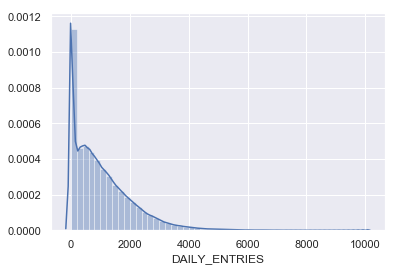

In [58]:
stations_daily_top10 = \
    stations_daily[stations_daily['STATION_LINE'].isin(top10_stations)]

sns.distplot(turnstiles_daily['DAILY_ENTRIES'])


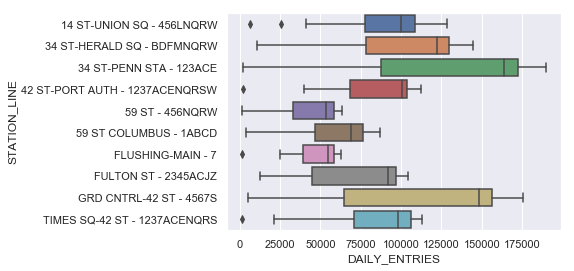

In [59]:
sns.boxplot('DAILY_ENTRIES', 'STATION_LINE', data=stations_daily_top10)

In [60]:
mydatecounts = pd.DataFrame(turnstiles_df.DATE.value_counts().sort_index())
mydatecounts

,DATE
01/01/2018,28157
01/02/2018,28103
01/03/2018,28104
01/04/2018,31029
01/05/2018,28986
01/06/2018,28226
01/07/2018,28128
01/08/2018,28132
01/09/2018,29970
01/10/2018,29691


In [120]:
turnstiles_daily.groupby(["DATE"]).sum()[["DAILY_ENTRIES", "DAILY_EXITS"]]

,DAILY_ENTRIES,DAILY_EXITS
DATE,,
01/02/2018,5122646.0,3888858.0
01/03/2018,5677254.0,4267474.0
01/04/2018,3101243.0,2482050.0
01/05/2018,4875954.0,3662469.0
01/06/2018,2565627.0,2086348.0
01/07/2018,2136645.0,1744918.0
01/08/2018,5473144.0,4087675.0
01/09/2018,5800552.0,4351898.0
01/10/2018,5857870.0,4399736.0


In [134]:
top_turnstile = turnstiles_daily.loc[(turnstiles_daily["C/A"] == "R238")
                                     & (turnstiles_daily["UNIT"] == "R046")
                                     & (turnstiles_daily["SCP"] == "00-03-02")
                                     & (turnstiles_daily["STATION_LINE"])]
top_turnstile["DATETIME"] = pd.to_datetime(top_turnstile["DATE"])
top_turnstile=top_turnstile.sort_values("DATETIME")
top_turnstile
#& turnstiles_daily[] == "" &)]
#groupby(["DATE"]).sum()[["DAILY_ENTRIES", "DAILY_EXITS"]]

/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,C/A,UNIT,SCP,STATION_LINE,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,CUS,SCU,DATETIME
1322676,R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,09/22/2017,403673,143694,09/21/2018,2698797.0,843020.0,0.0,0.0,GRD CNTRL-42 ST - 4567S-R238-R046,GRD CNTRL-42 ST - 4567S-R238-R046,2017-09-22
1322677,R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,09/23/2017,407372,146501,09/22/2017,403673.0,143694.0,3699.0,2807.0,GRD CNTRL-42 ST - 4567S-R238-R046,GRD CNTRL-42 ST - 4567S-R238-R046,2017-09-23
1322678,R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,09/24/2017,410017,149058,09/23/2017,407372.0,146501.0,2645.0,2557.0,GRD CNTRL-42 ST - 4567S-R238-R046,GRD CNTRL-42 ST - 4567S-R238-R046,2017-09-24
1322679,R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,09/25/2017,417100,151398,09/24/2017,410017.0,149058.0,7083.0,2340.0,GRD CNTRL-42 ST - 4567S-R238-R046,GRD CNTRL-42 ST - 4567S-R238-R046,2017-09-25
1322680,R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,09/26/2017,424006,153908,09/25/2017,417100.0,151398.0,6906.0,2510.0,GRD CNTRL-42 ST - 4567S-R238-R046,GRD CNTRL-42 ST - 4567S-R238-R046,2017-09-26
1322681,R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,09/27/2017,431117,156709,09/26/2017,424006.0,153908.0,7111.0,2801.0,GRD CNTRL-42 ST - 4567S-R238-R046,GRD CNTRL-42 ST - 4567S-R238-R046,2017-09-27
1322682,R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,09/28/2017,439943,158992,09/27/2017,431117.0,156709.0,8826.0,2283.0,GRD CNTRL-42 ST - 4567S-R238-R046,GRD CNTRL-42 ST - 4567S-R238-R046,2017-09-28
1322683,R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,09/29/2017,449716,161053,09/28/2017,439943.0,158992.0,9773.0,2061.0,GRD CNTRL-42 ST - 4567S-R238-R046,GRD CNTRL-42 ST - 4567S-R238-R046,2017-09-29
1322684,R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,09/30/2017,454873,163715,09/29/2017,449716.0,161053.0,5157.0,2662.0,GRD CNTRL-42 ST - 4567S-R238-R046,GRD CNTRL-42 ST - 4567S-R238-R046,2017-09-30
1322685,R238,R046,00-03-02,GRD CNTRL-42 ST - 4567S,10/01/2017,459722,165792,09/30/2017,454873.0,163715.0,4849.0,2077.0,GRD CNTRL-42 ST - 4567S-R238-R046,GRD CNTRL-42 ST - 4567S-R238-R046,2017-10-01


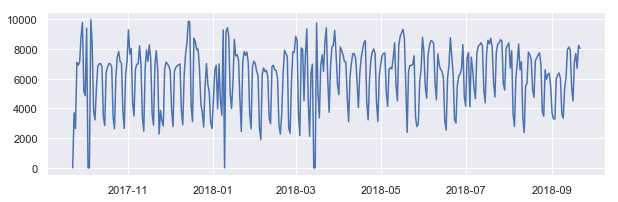

In [135]:
# Challenge 4 - plot for a turnstile

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(top_turnstile.DATETIME,top_turnstile.DAILY_ENTRIES);
# couple of 0s - either bad data that got trimmed, or maybe construction or out of service

In [73]:
#Challenge 5 - group by station, control area, unit
# will group by STATION_LINE - should be same as STATION for this purpose (and I already deleted STATION)
turnstiles_daily['SCU'] = turnstiles_daily['STATION_LINE'] + "-" + turnstiles_daily['C/A'] + "-" + turnstiles_daily["UNIT"] 
turnstiles_daily_scu = turnstiles_daily.groupby(["DATE", "SCU"],as_index=False)["DAILY_ENTRIES","DAILY_EXITS"].sum()
turnstiles_daily_scu

,DATE,SCU,DAILY_ENTRIES,DAILY_EXITS
0,01/02/2018,1 AV - L-H007-R248,11746.0,6684.0
1,01/02/2018,1 AV - L-H008-R248,7521.0,15184.0
2,01/02/2018,103 ST - 1-R170-R191,11142.0,5180.0
3,01/02/2018,103 ST - 6-R252-R180,11910.0,10166.0
4,01/02/2018,103 ST - BC-N037-R314,4049.0,2588.0
5,01/02/2018,103 ST-CORONA - 7-R529-R208,17004.0,13239.0
6,01/02/2018,104 ST - A-N137-R354,1695.0,626.0
7,01/02/2018,104 ST - JZ-J034-R007,1296.0,157.0
8,01/02/2018,110 ST - 6-R253-R181,3134.0,5648.0
9,01/02/2018,110 ST - 6-R254-R181,7240.0,2647.0


In [76]:
# Challenge 6 - Group by station (+ line to disambiguate all the 23 St stations on different lines or 7 Av Manhattan/Brooklyn)
turnstiles_daily_station = turnstiles_daily.groupby(["DATE", "STATION_LINE"],as_index=False)["DAILY_ENTRIES","DAILY_EXITS"].sum()
turnstiles_daily_station

,DATE,STATION_LINE,DAILY_ENTRIES,DAILY_EXITS
0,01/02/2018,1 AV - L,19267.0,21868.0
1,01/02/2018,103 ST - 1,11142.0,5180.0
2,01/02/2018,103 ST - 6,11910.0,10166.0
3,01/02/2018,103 ST - BC,4049.0,2588.0
4,01/02/2018,103 ST-CORONA - 7,17004.0,13239.0
5,01/02/2018,104 ST - A,1695.0,626.0
6,01/02/2018,104 ST - JZ,1296.0,157.0
7,01/02/2018,110 ST - 6,10374.0,8295.0
8,01/02/2018,111 ST - 7,10217.0,6196.0
9,01/02/2018,111 ST - A,2325.0,752.0


In [180]:
turnstiles_daily_GC = turnstiles_daily_station.loc[turnstiles_daily_station["STATION_LINE"]=="GRD CNTRL-42 ST - 4567S"].sort_values("DATE")
turnstiles_daily_GC["DATETIME"] = pd.to_datetime(turnstiles_daily_GC.DATE)
turnstiles_daily_GC = turnstiles_daily_GC.sort_values("DATETIME")[turnstiles_daily_GC["DATETIME"] > pd.to_datetime("09/22/2017")]
turnstiles_daily_GC

/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,STATION_LINE,DAILY_ENTRIES,DAILY_EXITS,DATETIME
120900,09/23/2017,GRD CNTRL-42 ST - 4567S,68053.0,64598.0,2017-09-23
121359,09/24/2017,GRD CNTRL-42 ST - 4567S,50291.0,51529.0,2017-09-24
121818,09/25/2017,GRD CNTRL-42 ST - 4567S,150553.0,144058.0,2017-09-25
122277,09/26/2017,GRD CNTRL-42 ST - 4567S,151323.0,141126.0,2017-09-26
122736,09/27/2017,GRD CNTRL-42 ST - 4567S,162355.0,143665.0,2017-09-27
123193,09/28/2017,GRD CNTRL-42 ST - 4567S,161293.0,145708.0,2017-09-28
123650,09/29/2017,GRD CNTRL-42 ST - 4567S,140672.0,136960.0,2017-09-29
124108,09/30/2017,GRD CNTRL-42 ST - 4567S,61914.0,61444.0,2017-09-30
124567,10/01/2017,GRD CNTRL-42 ST - 4567S,51543.0,49830.0,2017-10-01
125026,10/02/2017,GRD CNTRL-42 ST - 4567S,148721.0,144318.0,2017-10-02


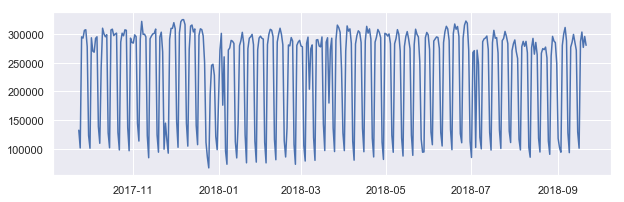

In [181]:
# Challenge 7 - plot time series for a station

turnstiles_daily_GC["TOTAL"] = turnstiles_daily_GC.DAILY_ENTRIES+turnstiles_daily_GC.DAILY_EXITS
turnstiles_daily_GC = turnstiles_daily_GC.sort_values("DATETIME")
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(turnstiles_daily_GC["DATETIME"], turnstiles_daily_GC["TOTAL"]);
        # a bit surprising that it went to 0 on weekends up ot 1018-07

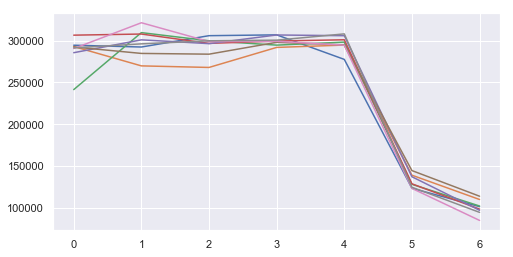

In [214]:
#Challenge 8 - weekly plots

turnstiles_daily_GC["DOW"] = [d.weekday() for d in turnstiles_daily_GC["DATETIME"]]
fig, ax = plt.subplots(figsize=(8,4))

for startindex in range(2, 58, 7):

    tempdf1 = turnstiles_daily_GC.iloc[startindex:startindex+7]["DOW"]
    tempdf2 = turnstiles_daily_GC.iloc[startindex:startindex+7]["TOTAL"]
#    print(tempdf1)
    ax.plot(tempdf1, tempdf2)


In [161]:
turnstiles_daily_wall23.iloc[3:10]

,DATE,STATION_LINE,DAILY_ENTRIES,DAILY_EXITS,DATETIME,DOW
121963,09/25/2017,WALL ST - 23,24538.0,24078.0,2017-09-25,0
122422,09/26/2017,WALL ST - 23,27443.0,26472.0,2017-09-26,1
122881,09/27/2017,WALL ST - 23,29086.0,27377.0,2017-09-27,2
123338,09/28/2017,WALL ST - 23,28353.0,27357.0,2017-09-28,3
123794,09/29/2017,WALL ST - 23,25586.0,25305.0,2017-09-29,4
124253,09/30/2017,WALL ST - 23,1958.0,1578.0,2017-09-30,5
124712,10/01/2017,WALL ST - 23,15.0,413.0,2017-10-01,6


In [231]:
# Challenge 9 - highest traffic stations

turnstiles_daily_station["TOTAL"] = turnstiles_daily_station["DAILY_ENTRIES"] + turnstiles_daily_station["DAILY_EXITS"]
total_ridership_counts = turnstiles_daily_station.groupby(["STATION_LINE"]).mean()["TOTAL"].sort_values(ascending=False)
total_ridership_counts = pd.DataFrame(total_ridership_counts)
total_ridership_counts
# Penn is highest b/c we combined 8th and 7th Ave
# If we combined Times Square and Port Authority that would be higher


,TOTAL
STATION_LINE,
34 ST-PENN STA - 123ACE,260747.513736
GRD CNTRL-42 ST - 4567S,232434.958791
34 ST-HERALD SQ - BDFMNQRW,201371.582418
14 ST-UNION SQ - 456LNQRW,173386.255495
TIMES SQ-42 ST - 1237ACENQRS,171235.983516
42 ST-PORT AUTH - 1237ACENQRSW,155915.021978
FULTON ST - 2345ACJZ,138691.244505
59 ST COLUMBUS - 1ABCD,112953.285714
47-50 STS ROCK - BDFM,94699.373626


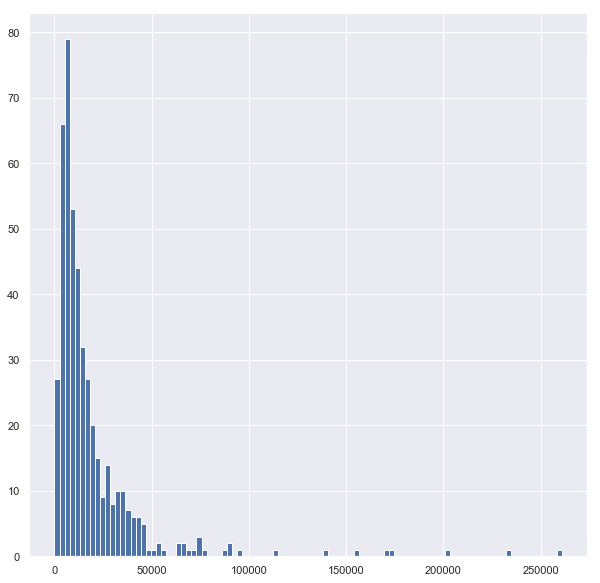

In [238]:
plt.figure(figsize=(10,10))

plt.hist(total_ridership_counts.values, bins=100);

